<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Pascal_MusabyimanaCTAIGroep20DS_21_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:mediumvioletred"> Examen data science 21/05/2025

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## <span style="color:darkorange"> Deel 1 - video games sales
    
<img src="Video-Games.jpg">

Tijdens dit examen zullen we starten met het analyseren van de dataset `vgsales.csv`. Deze dataset bevat gegevens over de wereldwijde verkoop van videogames. Het bestand bevat de volgende kolommen:

| Variable Name |Description |
| --- | --- |
|Rank|Ranking of overall sales (numeric)|
|Name|The games name (string)|
|Platform|Platform of the games release (i.e. PC,PS4, etc.) (numeric)|
|Year|Year of the game's release (numeric)|
|Genre | Genre of the game (categorical)|
|Publisher | Publisher of the game (categorical)|
|NA_Sales | Sales in North America (in millions) (numeric) |
|EU_Sales | Sales in EUrope (in millions) (numeric) |
|JP_Sales | Sales in Japan (in millions) (numeric) |
|Other_Sales | Sales in the rest of the world (in millions) (numeric)|

a. Laad de dataset `vgsales.csv` in. Gebruik de rank van het spel als index.

In [ ]:
dataset = pd.read_csv('vgsales.csv', index_col='Rank')
dataset.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


b. Hoeveel rijen en kolommen zijn aanwezig in de dataset?

In [ ]:
dataset.shape[0]

16598

In [ ]:
dataset.shape[1]

9

c. Verwijder de kolom year uit de dataset.

In [ ]:
dataset = dataset.drop(['Year'], axis=1)
dataset.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96
5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


d. Zijn er ontbrekende waarden aanwezig in de dataset? Zo ja gebruik een passende methode om dit probleem op te lossen.

In [ ]:
dataset.isnull().sum()

,0
Name,0
Platform,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
Name,0
Platform,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


e. Welke genre van video games wordt het vaakst gemaakt? Visualiseer dit aan de hand van een gepaste grafiek.

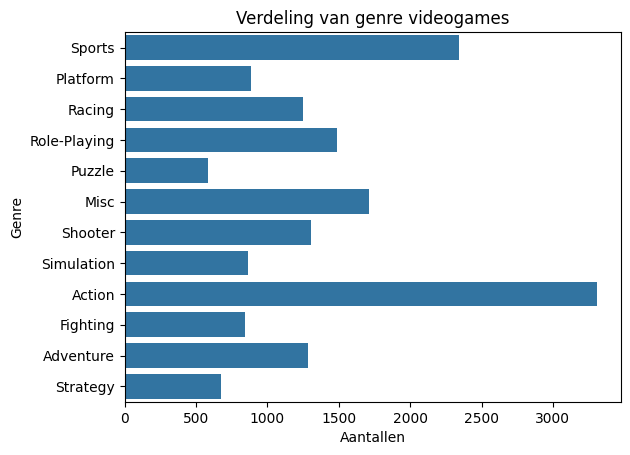

In [ ]:
sns.countplot(dataset['Genre'])
plt.title('Verdeling van genre videogames')
plt.xlabel('Aantallen')
plt.ylabel('Genre')
plt.show()

f. Filter de dataset zodat we enkel naar het platform van de Wii kijken. Welk spel voor de Wii werd het meest in Europa verkocht?

In [ ]:
dataset = dataset[(dataset['Platform'] == 'Wii')]
dataset.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96
8,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26


In [18]:
top_game = dataset[dataset['EU_Sales'] == dataset['EU_Sales'].max()]
print('Meest verkochte Wii-spel in Europa:', top_game['Name'].values[0])


Meest verkochte Wii-spel in Europa: Wii Sports


g. Voeg een nieuwe kolom toe met de naam `Global_Sales` waar je de sales per continent bij elkaar optelt.

⚠️ f. Meest verkochte spel in EU op Wii
❌ Fout bij het bepalen van het meest verkochte spel. Je gebruikt .mode() maar dat toont de meest frequente waarde, niet de hoogste verkoop.

In [ ]:
dataset.insert(8,'Global_Sales',dataset['EU_Sales'] + dataset['JP_Sales'] + dataset['NA_Sales'] + dataset['Other_Sales'])
dataset.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61


h. Vanaf dit gedeelte zullen we enkel verder werken met de games uitgegeven door Nintendo. Filter de dataset zelf.

In [ ]:
dataset = dataset[(dataset['Publisher'] == 'Nintendo')]
dataset.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61


i. Maak een histogram van de kolom Global_Sales. Verdeel zelf in klasses.

Text(0.5, 0, 'Global sales')

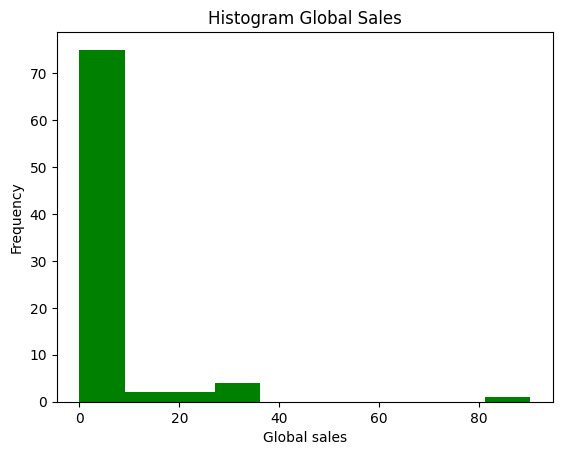

In [ ]:
#plotren histogram
import matplotlib.pyplot as plt
minimum = dataset.Global_Sales.min()
maximum = dataset.Global_Sales.max()
breedte = maximum - minimum
klassenbreedte = breedte/np.sqrt(dataset.Global_Sales.count())
bins = np.arange(minimum,maximum+klassenbreedte,klassenbreedte)
dataset['Global_Sales'].plot(kind='hist',bins=bins,color='green')
plt.title('Histogram Global Sales')
plt.xlabel('Global sales')





j. Is deze data normaalverdeeld? Argumenteer aan de hand van het gemiddelde en de standaardafwijking. Is dit ook terug te zien in het histogram? neen aan de hand van de histogram kan je zien dat de data niet normaal verdeeld is ook als je als je zou kijken anar stadaardafwijkingen binnen de eerste 2 en 3de zou je kunnen zien dat de data niet normaal verdeeld is ( standardfawijkingen weens te weinig tijd niet gedaan)

In [ ]:
gemiddelde = dataset['Global_Sales'].mean()
standnaardafwijking = dataset['Global_Sales'].std()
print(gemiddelde)
print(standnaardafwijking)


4.648452380952381
11.431816254525053


k. Iemand beweert dat puzzel spelletjes (genre: Puzzle) globaal beter verkopen dan actie spelletjes (genre: Action). Klopt deze bewering? Staaf je antwoord aan de hand van twee boxplots. (werk met subplotjes)

Text(0.5, 1.0, 'Action games')

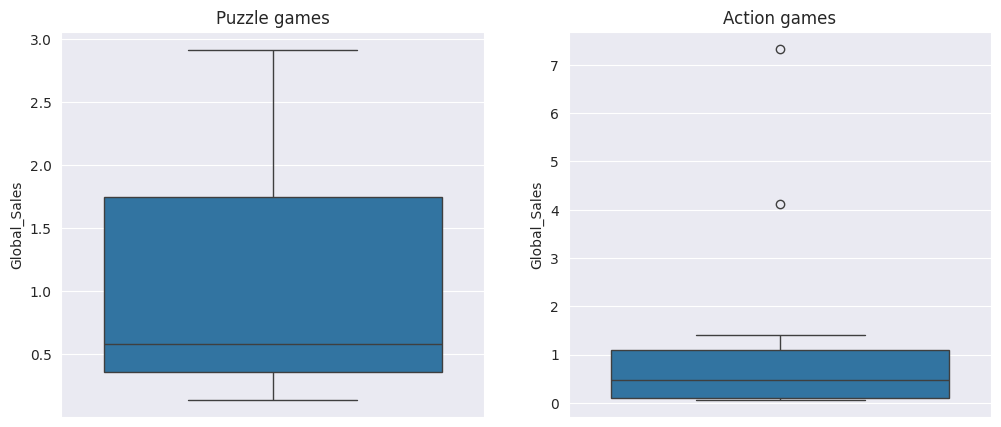

In [19]:
f, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(y=dataset[dataset['Genre']=='Puzzle']['Global_Sales'], ax=axes[0])
axes[0].set_title('Puzzle games')

sns.boxplot(y=dataset[dataset['Genre']=='Action']['Global_Sales'], ax=axes[1])
axes[1].set_title('Action games')


❌ k. Puzzle vs Action boxplots
❌ De boxplots tonen geen verkoopdata, enkel genre-categorieën. Je moet Global_Sales plotten per genr

In [ ]:
import numpy as np
print('correlatie tussen EU sales en Global Sales:\n'
, np.corrcoef(dataset['EU_Sales'],dataset['Global_Sales']))


correlatie tussen EU sales en Global Sales:
 [[1.         0.99353517]
 [0.99353517 1.        ]]


l. Iemand beweert dat als een spelletje in Europa goed verkoopt, het ook globaal goed zal verkopen. Klopt deze bewering? Staaf je antwoord aan de hand van een scatterplot en de correlatiecoefficient yes als je kijjkt naar de correlatiecoefficient klopt dit volledig

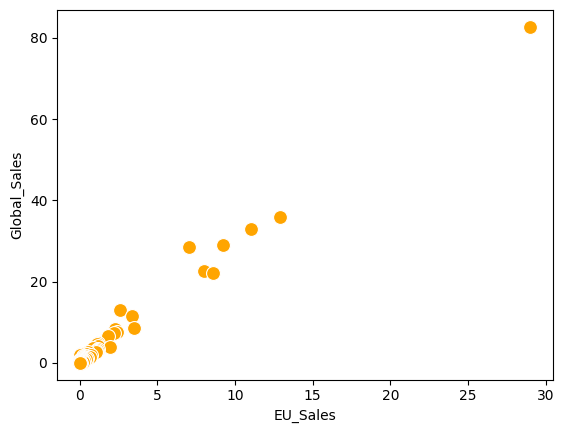

In [ ]:
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=dataset,color='orange',s=100)
sns.set_style("darkgrid")


## <span style="color:darkorange"> Deel 2 - tijdsreeksen

In `Electricity_usage.csv` werd het verbruik van elektriciteit per uur (in kwh) van een gezin bijgehouden.

<img src="1534767830-elektriciteitsnet.jpg">  



Het bestand `Electricity_usage.csv` bevat:  

| Variable Name |Description |
| --- | --- |
|TYPE | Which type of usage has taken place. |
|DATE | Date of electric consumption. There is no timestamp in this field. |
|START TIME | Start time of the consumption. |
|END TIME | End time of the consumption |
|USAGE | Consumption in kWh |

a. Lees `Electricity_usage.csv` in. Er hoeft geen kolom ingelezen te worden als index. Print de eerste vijf rijen van de dataset af.

In [21]:
dataset = pd.read_csv('Electricity_usage.csv',)
dataset.head()

,TYPE,DATE,START TIME,END TIME,USAGE
0,Electric usage,1/13/2017,0:00,0:59,0.16
1,Electric usage,1/13/2017,1:00,1:59,0.12
2,Electric usage,1/13/2017,2:00,2:59,0.12
3,Electric usage,1/13/2017,3:00,3:59,0.12
4,Electric usage,1/13/2017,4:00,4:59,0.08


In [22]:
# Verwijder spaties aan begin en eind van alle kolomnamen
dataset.columns = dataset.columns.str.strip()


b. In principe mag de kolom `TYPE` verwijdert worden. Enig idee waarom? Verwijder dan ook deze kolom. omdat het allemaal hetzelfde type is

<Axes: xlabel='count'>

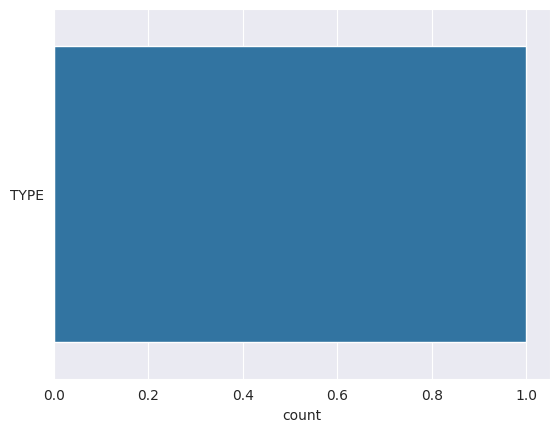

In [23]:
sns.countplot('TYPE')

In [24]:
dataset = dataset.drop(['TYPE'], axis=1)
dataset.head()

,DATE,START TIME,END TIME,USAGE
0,1/13/2017,0:00,0:59,0.16
1,1/13/2017,1:00,1:59,0.12
2,1/13/2017,2:00,2:59,0.12
3,1/13/2017,3:00,3:59,0.12
4,1/13/2017,4:00,4:59,0.08


c. We focussen ons nu op de kolom Usage (verbruik). Is deze tijdsreeks een stationaire of niet-stationaire tijdsreeks? Staaf je antwoord aan de hand van de regressielijn en de bijhorende coëfficiënten. Geef weer op één grafiek.

Text(0, 0.5, 'USAGE')

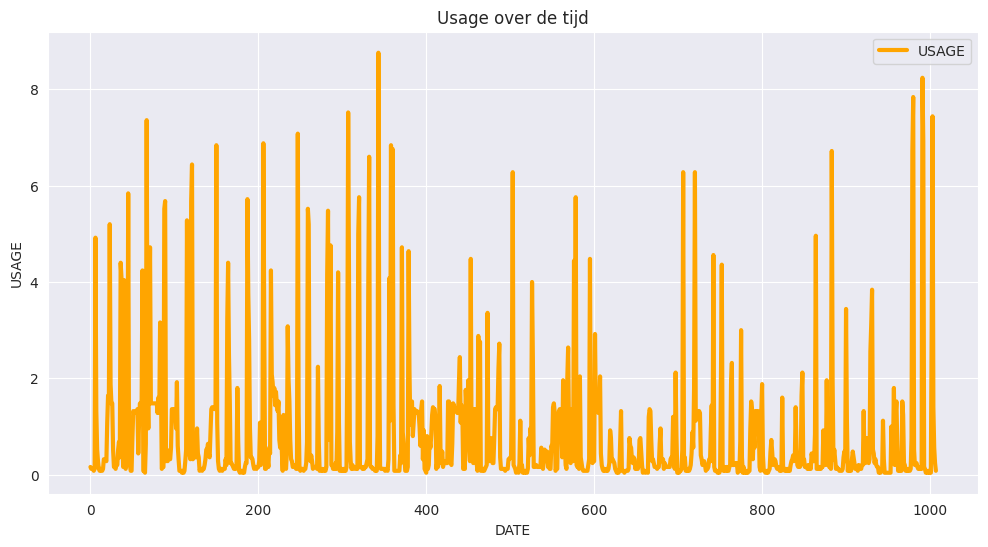

In [25]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Usage over de tijd')
plt.xlabel("DATE")
plt.ylabel("USAGE")

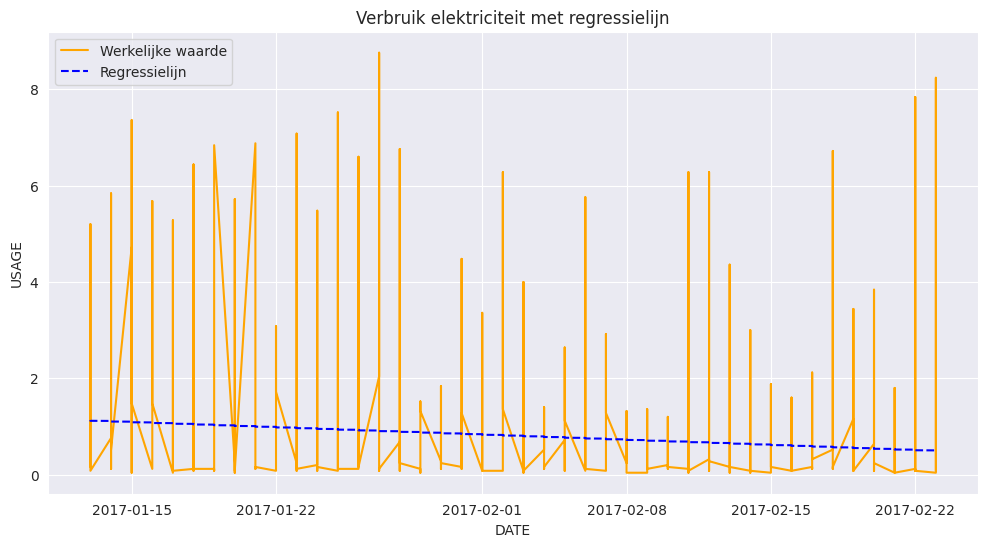

Intercept = 1.1324835999811225
Richtingscoëfficiënt = -0.0006369372109144137


In [26]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
dataset = dataset.sort_values('DATE')  # Sorteren op tijd
dataset.set_index('DATE', inplace=True)

x = np.arange(len(dataset))
y = dataset['USAGE'].values

regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1, 1), y)

plt.figure(figsize=(12,6))
plt.plot(dataset.index, y, label='Werkelijke waarde', color='orange')
plt.plot(dataset.index, regressionline.predict(x.reshape(-1, 1)), label='Regressielijn', linestyle='--', color='blue')
plt.xlabel('DATE')
plt.ylabel('USAGE')
plt.title('Verbruik elektriciteit met regressielijn')
plt.legend()
plt.show()

print('Intercept =', regressionline.intercept_)
print('Richtingscoëfficiënt =', regressionline.coef_[0])


⚠️ c. Stationariteit bepalen via regressielijn
Je doel is om na te gaan of er een trend zit in het verbruik → dan is het niet-stationair. Je probeert dit via een regressielijn over USAGE. Maar:

Fout:
Je gebruikt dit:

python
Copy
Edit
y = dataset[dataset.columns[0]].values  # Dit pakt de verkeerde kolom
De kolom die je moet gebruiken is USAGE, dus beter:

python
Copy
Edit
y = dataset['USAGE'].values
Daarnaast gebruik je dataset.index als tijdsreeks. Dat kan, maar is beperkt. Beter is om DATE om te zetten naar datetime en te gebruiken als index. Als de richtingscoëfficiënt ≠ 0 → niet-stationair.



d. Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit de volgende technieken die in de cursus aan bod zijn gekomen:
- Moving average: 3, 5, 10.
- Exponentiële demping. Zorg dat je de optimale alfa kan vinden.

Welke techniek werkt het best bij deze dataset?

In [27]:
dataset['MA3'] = dataset['USAGE'].rolling(window=3).mean().shift()
dataset['MA5'] = dataset['USAGE'].rolling(window=5).mean().shift()
dataset['MA10'] = dataset['USAGE'].rolling(window=10).mean().shift()


In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

best_alpha = None
best_mae = float('inf')
best_forecast = None

alphas = np.arange(0.01, 1, 0.01)

for alpha in alphas:
    model = SimpleExpSmoothing(dataset['USAGE'], initialization_method='heuristic').fit(smoothing_level=alpha, optimized=False)
    forecast = model.fittedvalues
    mae = np.mean(np.abs(dataset['USAGE'] - forecast))
    if mae < best_mae:
        best_mae = mae
        best_alpha = alpha
        best_forecast = forecast

print(f'Beste alfa = {best_alpha}, MAE = {best_mae}')
dataset['ExpSmoothing'] = best_forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Beste alfa = 0.44, MAE = 0.8364384258356448


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


e. Plot de echte waarden en de waarden van de beste voorspellingstechniek op één grafiek.

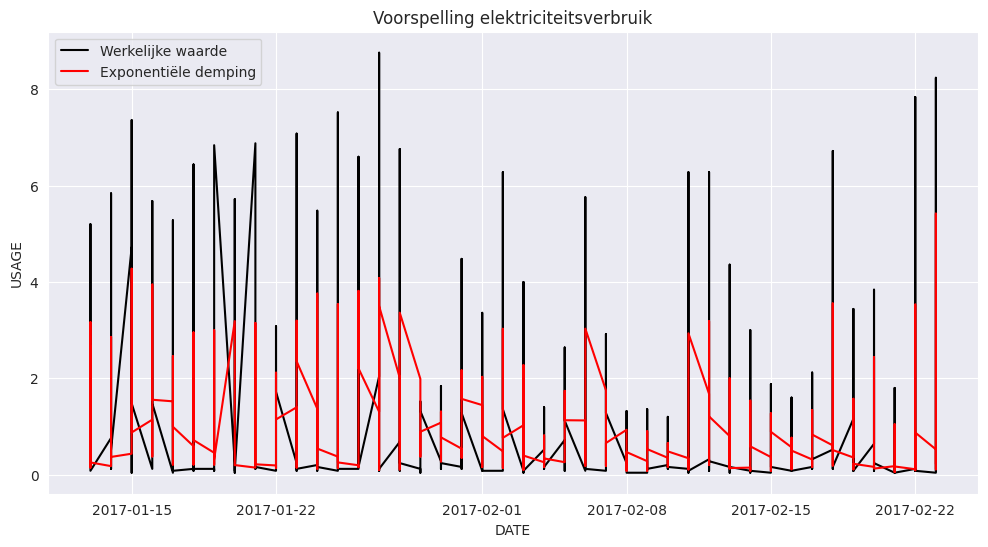

In [29]:
plt.figure(figsize=(12,6))
plt.plot(dataset.index, dataset['USAGE'], label='Werkelijke waarde', color='black')
plt.plot(dataset.index, dataset['ExpSmoothing'], label='Exponentiële demping', color='red')
plt.title('Voorspelling elektriciteitsverbruik')
plt.xlabel('DATE')
plt.ylabel('USAGE')
plt.legend()
plt.show()
